<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/My_titanic_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/files")

In [50]:
#Install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Find out what data look like

train_df = pd.read_csv('ttn_train.csv')
test_df = pd.read_csv('tn_test.csv')

print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test_df.head() #Column Survived가 없다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
#Check nulls
train_df.isnull().sum()
# Cabin & Age have nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
train_df.info()
# 5 objects catagories and 2 float catagories that I need to deal with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

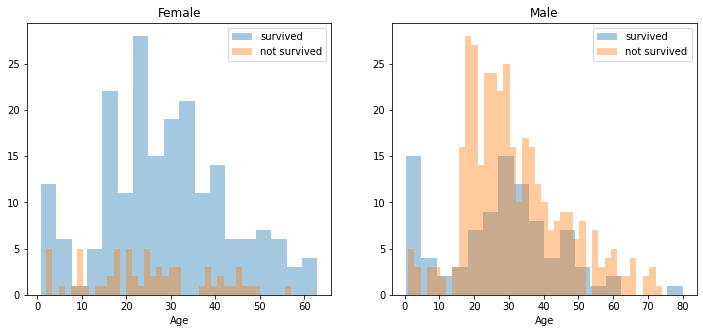

In [56]:
# Age and Sex visualization
survived='survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
men = train_df[train_df['Sex'] == 'male']
women = train_df[train_df['Sex'] == 'female']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, kde=False, label=not_survived, ax=axes[0])
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, kde=False, ax=axes[1])
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, kde=False, ax=axes[1])
ax.legend()
ax.set_title('Male')




/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


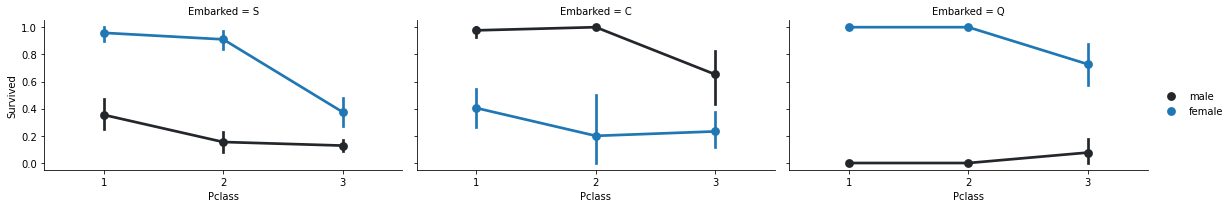

In [57]:
#Embarked, Pclass and Sex

FacetGrid=sns.FacetGrid(train_df, col='Embarked',aspect=1.8)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived','Sex')
FacetGrid.add_legend()

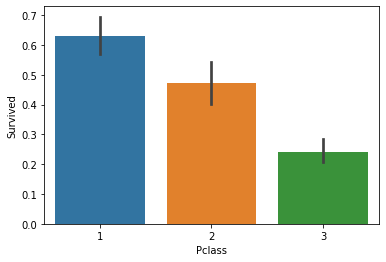

In [58]:
# Pclass

sns.barplot(x='Pclass', y='Survived', data=train_df)


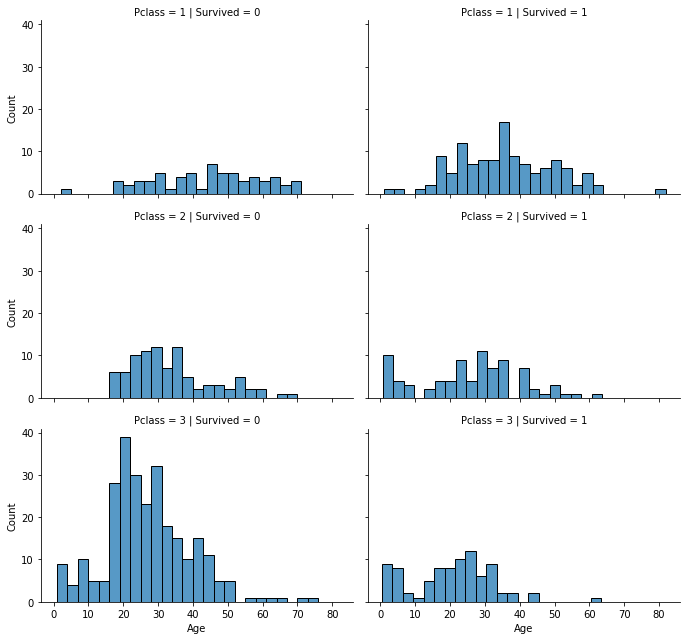

In [59]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(sns.histplot, 'Age', binwidth=3)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/

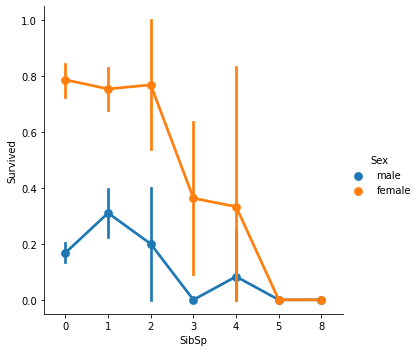

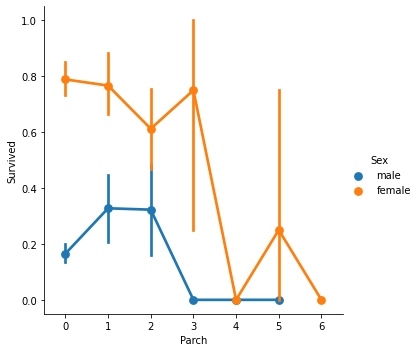

In [60]:
#SipSp
ax = sns.factorplot('SibSp', 'Survived', data=train_df, hue='Sex')
ax = sns.factorplot('Parch', 'Survived', data=train_df, hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


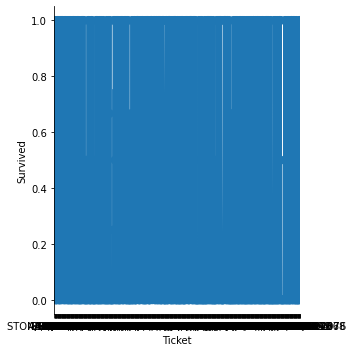

In [61]:
sns.factorplot('Ticket', 'Survived', data=train_df)

# Data Preprocessing

In [62]:
train_df = train_df.drop(columns='PassengerId', axis=1)

In [63]:
#Deal with Missing data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [64]:
# Age : class별 나이 평균으로 넣어주자 / Train , test data 둘다. 

data = [train_df, test_df]

for dataset in data:
  dataset['Age'] =dataset.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.mean())).astype(int)


In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 36.0+ KB


In [66]:
#Name, Fare, Cabin, Ticket은 drop

data=[train_df, test_df]
for dataset in data:
  dataset.drop(columns='Cabin', axis=1, inplace=True)
  dataset.drop(columns='Fare', axis=1, inplace=True)
  dataset.drop(columns='Name', axis=1, inplace=True)
  dataset.drop(columns='Ticket', axis=1, inplace=True)

In [67]:
#Embarked

train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
data=[train_df, test_df]
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [69]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S


In [70]:
# Coverting dtypes 
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Embarked  891 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


In [71]:
#Sex: int로 변환(encoding)

data=[train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].replace({'male':0, 'female':1})

In [72]:
#Embarked: int로 변환(encoding)

data=[train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].replace({'S':0, 'C':1, 'Q':2})

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Embarked  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


# Adding new categories

In [74]:
k = dataset.loc[dataset['Age'] <= 11, 'Age']
print(k)



21      9
55     10
80      6
89      2
117     1
140    10
161     7
192    11
194     8
196     6
201     0
203     8
250     0
263     1
281     0
283     9
284     2
296     1
307     0
354     0
379     5
389     6
409     3
Name: Age, dtype: int64


In [75]:
# Age group
data=[train_df, test_df]

for dataset in data:

   #11보다 작은 값을 가진 컬럼들이 쭉 나오는데 뒤에 'Age'가 있음으로 'AGE' 컬럼만 선택되는 원리임.
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [76]:
train_df['Age'].value_counts()

3    200
6    169
4    137
2    134
5    112
1     71
0     68
Name: Age, dtype: int64

In [77]:
#Family

data=[train_df, test_df]

for dataset in data:
  dataset['Family'] = dataset['SibSp'] + dataset['Parch']

# Building Models

In [78]:
# Data Split
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Family'],
      dtype='object')

In [79]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1)

In [80]:
# Try RandomForest First

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

acc_random_forest = round(rf.score(X_train, y_train)*100,2)
acc_random_forest


87.88

In [85]:
#submission
submission = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': y_preds}).set_index('PassengerId')



In [87]:
submission.to_csv('submission.csv')